# Overview
Cart abandonment happens when shoppers add products to their online carts but exit the website before finalizing their purchase. This poses a major challenge for eCommerce businesses, leading to lost revenue while also offering valuable insights into customer behavior and preferences.

Problem Statement
Understanding cart abandonment allows businesses to pinpoint where and why customers leave the purchasing funnel. These insights can help reduce abandonment rates, recover lost sales, and enhance customer satisfaction.

The eCommerce business is facing a significant challenge with high cart abandonment rates, as many customers add items to their carts but do not complete their purchases.

# Business Questions to Answer
* Device-Specific Abandonment: What are the cart abandonment rates across different devices (desktop, mobile, tablet)?

* Product-Specific Abandonment: Which product categories experience the highest rates of abandonment? Are there certain products that are frequently abandoned?

* Time-Specific Trends: Are there specific times of the day, days of the week, or months where cart abandonment spikes? What seasonal trends exist?


# Importing Libraries

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

# Import Datasets

In [2]:
from google.colab import files
file = files.upload()  #upload file into google colab session
customer= pd.read_csv("customer_table.csv")
customer.head()

Saving customer_table.csv to customer_table.csv


,customer_id,customer_name,age,gender,city
0,1,Customer 1,49,Female,London
1,2,Customer 2,45,Male,London
2,3,Customer 3,51,Male,London
3,4,Customer 4,38,Male,New York
4,5,Customer 5,26,Male,London


In [3]:
from google.colab import files
file = files.upload()  #upload file into google colab session
date = pd.read_csv("date_table.csv")
date.head()

Saving date_table.csv to date_table.csv


,date_id,date
0,1,1/1/2023
1,2,1/2/2023
2,3,1/3/2023
3,4,1/4/2023
4,5,1/5/2023


In [4]:
from google.colab import files
file = files.upload()  #upload file into google colab session
device = pd.read_csv("device_table.csv")
device.head()

Saving device_table.csv to device_table.csv


,device_id,device_type,os
0,1,Tablet,iOS
1,2,Desktop,iOS
2,3,Mobile,Windows
3,4,Mobile,Android
4,5,Tablet,iOS


In [5]:
from google.colab import files
file = files.upload()  #upload file into google colab session
product = pd.read_csv("product_table.csv")
product.head()

Saving product_table.csv to product_table.csv


,product_id,product_name,category,price
0,1,Laptop,Electronics,1026.94
1,2,Smartphone,Electronics,641.94
2,3,Headphones,Electronics,866.21
3,4,Smartwatch,Electronics,1221.77
4,5,Camera,Electronics,1290.76


In [6]:
from google.colab import files
file = files.upload()  #upload file into google colab session
fact = pd.read_csv("fact_table.csv")
fact.head()

Saving fact_table.csv to fact_table.csv


,session_id,customer_id,product_id,device_id,date_id,quantity,abandonment_time
0,1,979,20,5,252,4,7/13/2023
1,2,373,12,3,353,2,11/7/2023
2,3,32,3,4,286,2,3/3/2023
3,4,631,25,1,365,2,NaN
4,5,127,9,3,163,3,7/22/2023


# Table Info and Data Cleaning

In [ ]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date_id  366 non-null    int64 
 1   date     366 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [ ]:
date['date']=pd.to_datetime(date['date'])
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date_id  366 non-null    int64         
 1   date     366 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


In [ ]:
# Considering only year 2023 for analysis
date=date[date['date'].dt.year==2023]

In [ ]:
fact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   session_id        5000 non-null   int64 
 1   customer_id       5000 non-null   int64 
 2   product_id        5000 non-null   int64 
 3   device_id         5000 non-null   int64 
 4   date_id           5000 non-null   int64 
 5   quantity          5000 non-null   int64 
 6   abandonment_time  2524 non-null   object
dtypes: int64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
fact['abandonment_time']=pd.to_datetime(fact['abandonment_time'])
fact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   session_id        5000 non-null   int64         
 1   customer_id       5000 non-null   int64         
 2   product_id        5000 non-null   int64         
 3   device_id         5000 non-null   int64         
 4   date_id           5000 non-null   int64         
 5   quantity          5000 non-null   int64         
 6   abandonment_time  2524 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(6)
memory usage: 273.6 KB


In [ ]:
fact.isnull().sum()

session_id             0
customer_id            0
product_id             0
device_id              0
date_id                0
quantity               0
abandonment_time    2476
dtype: int64

In [ ]:
fact.duplicated().sum()

0

# Data Analysis

## **1. Demographic Insights**

In [ ]:
# Total Number of Customers
customer['customer_id'].count()

1000

So for this analysis we have total 1000 customers data

In [ ]:
# City wise Customer Count
city_customer=customer.groupby(['city']).agg({'customer_id':'count'}).rename(columns={'customer_id':'customer count'}).reset_index()

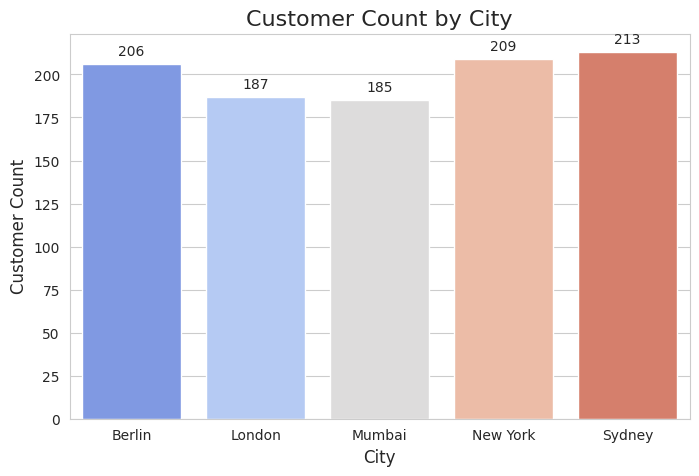

In [ ]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(8,5))
barplot = sns.barplot(x='city', y='customer count', data=city_customer, palette='coolwarm')

# Add data labels on the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),  # Format the label
                     (p.get_x() + p.get_width() / 2., p.get_height()),  # Position the label
                     ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=10)

# Add title and labels
plt.title('Customer Count by City', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Customer Count', fontsize=12)

# Display plot
plt.show()

From the above bar chart we can see Sydney has highest number of customers(213) followed by New York (209),Berlin(206), London(187) and Mumbai(185)

So **Sydney** has **highest** number of customers and **Mumbai** has **lowest** number of customers.

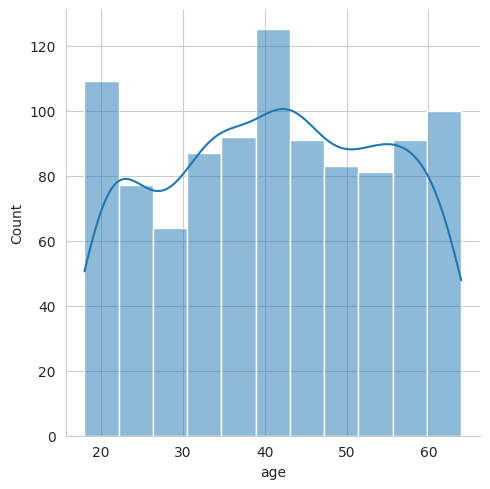

In [ ]:
# Age Distribution of All the Customers
sns.displot(customer['age'],kde=True)

From the above age distribution chart we can see most of customers age is 40

In [ ]:
# Genderwise Customer Distribution
gender_df=customer.groupby(['gender']).agg({'customer_id':'count'}).rename(columns={'customer_id':'customer count'}).reset_index()
gender_df

,gender,customer count
0,Female,501
1,Male,499


([<matplotlib.patches.Wedge at 0x7bcabb9f4ee0>,
 [Text(-1.099994571861817, -0.0034557017432520097, 'Female'),
  Text(1.099994571861817, 0.0034557017432518744, 'Male')],
 [Text(-0.5999970391973546, -0.0018849282235920048, '50.1%'),
  Text(0.5999970391973546, 0.0018849282235919313, '49.9%')])

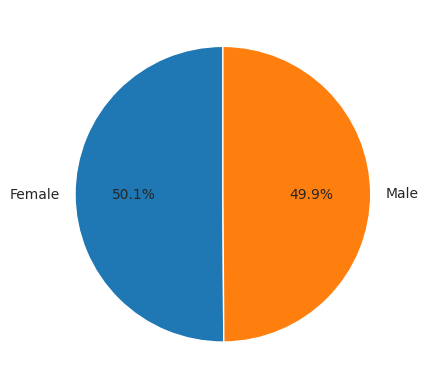

In [ ]:
plt.pie(gender_df['customer count'], labels=gender_df['gender'], autopct='%1.1f%%', startangle=90)

We have approximately equal proportion of Male & Female customers.

In [ ]:
city_gender=customer.groupby(['city','gender']).agg({'customer_id':'count'}).rename(columns={'customer_id':'customer count'}).reset_index()

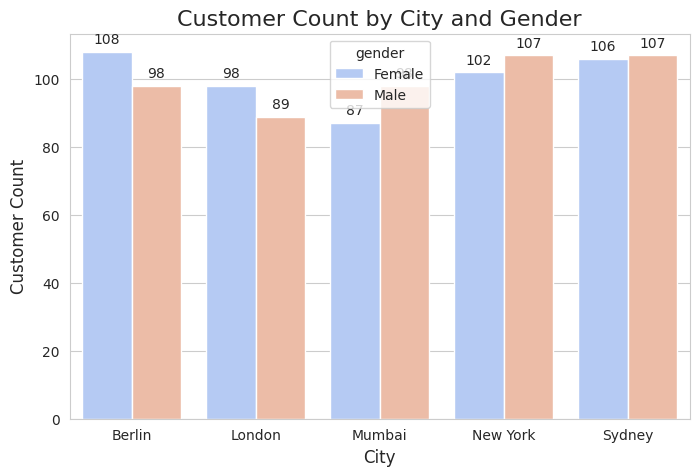

In [ ]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(8, 5))
barplot = sns.barplot(x='city', y='customer count', hue='gender', data=city_gender, palette='coolwarm')

# Add data labels on the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),  # Format the label
                     (p.get_x() + p.get_width() / 2., p.get_height()),  # Position the label
                     ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=10)

# Add title and labels
plt.title('Customer Count by City and Gender', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Customer Count', fontsize=12)

# Display plot
plt.show()

For **Berlin** and **London** **female customers** are more as compared to male customers but in **Mumbai,New York and Sydney** **male customers** are more as compared to female customers.

## **2. Cart Analysis**

In [ ]:
product_cart=pd.merge(product,fact,how='inner',on='product_id')
product_cart_qty=product_cart.groupby(['product_name']).agg({'quantity':'sum'}).reset_index()
product_cart_qty['Rank']=product_cart_qty['quantity'].rank(method='dense',ascending=False)
top_10_product=product_cart_qty[product_cart_qty['Rank']<=10].sort_values(by=['Rank'])

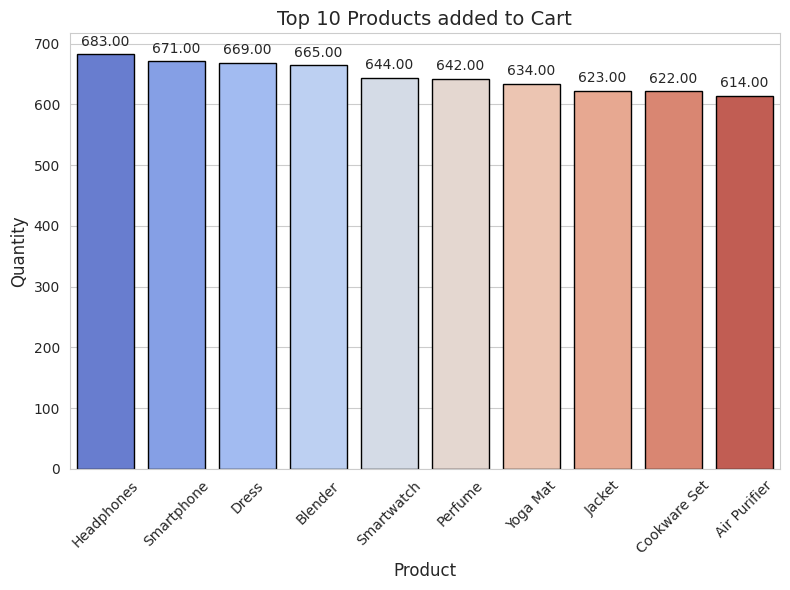

In [ ]:
# Setting figure size
plt.figure(figsize=(8,6))

# Creating bar plot using seaborn
ax = sns.barplot(x='product_name', y='quantity', data=top_10_product, palette='coolwarm', edgecolor='black')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adding title and labels
plt.title('Top 10 Products added to Cart', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Quantity', fontsize=12)

# Adding values on top of bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points')

# Display the plot
plt.tight_layout()
plt.show()

Above the bar chart shows top 10 products added to cart. From we can see
* Headphones,Smartphone is top 2 product that added to cart and these two belongs from same category i.e Electronics.
* Smartwatch is also in top 10 products added to cart. If we can combinatio of these theree products it could increase sales.

In [ ]:
# Top 3 Products of each category added to cart
category_product_cart=product_cart.groupby(['category','product_name']).agg({'quantity':'sum'}).reset_index()
category_product_cart['Rank']=category_product_cart.groupby(['category'])['quantity'].rank(method='dense',ascending=False)
top_2_cateory_product=category_product_cart[category_product_cart['Rank']<=3].sort_values(by=['category','Rank'],ascending=[True,True])

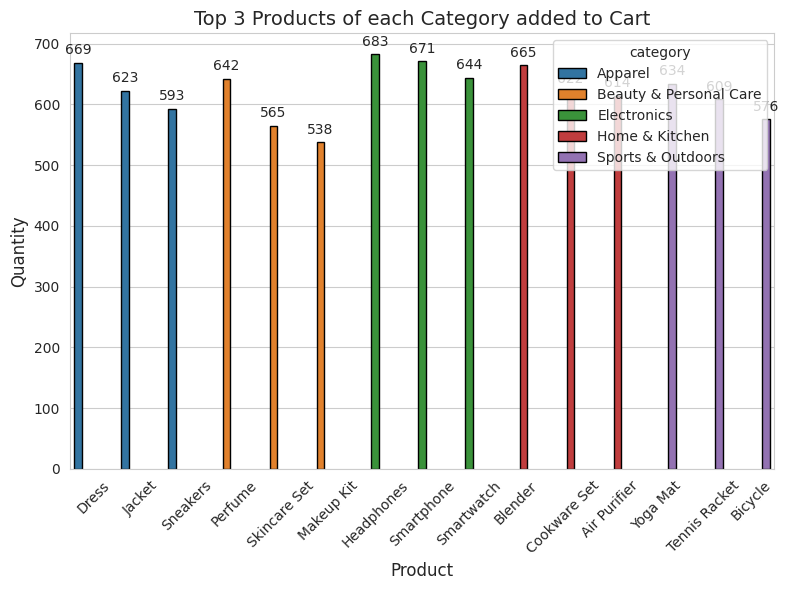

In [ ]:
# Setting figure size
plt.figure(figsize=(8,6))

# Creating bar plot using seaborn
ax = sns.barplot(x='product_name', y='quantity', data=top_2_cateory_product, hue='category', edgecolor='black')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adding title and labels
plt.title('Top 3 Products of each Category added to Cart', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Quantity', fontsize=12)

# Adding values on top of bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points')

# Display the plot
plt.tight_layout()
plt.show()

* Electronics and Home & Kitchen categories are seeing strong demand, with products like Headphones, Smartphones, and Blenders leading.
* Apparel and Beauty & Personal Care categories also have consistent sales across several products, particularly Dresses, Perfume, and Makeup Kits.
* Sports & Outdoors products show increasing interest, particularly with the Yoga Mat being the top product, reflecting a growing trend in fitness and wellness.

In [ ]:
customer_cart=pd.merge(customer,fact,how='inner',on='customer_id')
customer_cart_qty=customer_cart.groupby(['customer_name']).agg({'quantity':'sum'}).reset_index()
customer_cart_qty['Rank']=customer_cart_qty['quantity'].rank(method='dense',ascending=False)
top_customer_cart=customer_cart_qty[customer_cart_qty['Rank']<=5].sort_values(by=['Rank'])

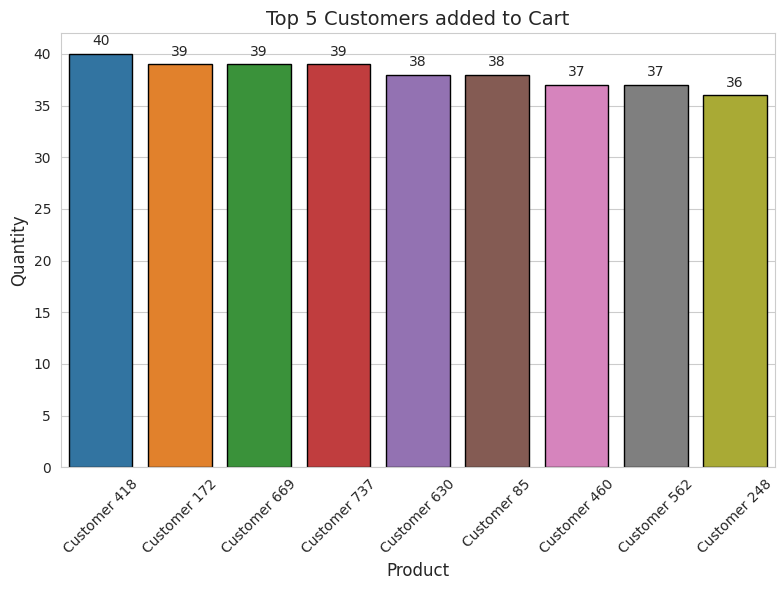

In [ ]:
# Setting figure size
plt.figure(figsize=(8,6))

# Creating bar plot using seaborn
ax = sns.barplot(x='customer_name', y='quantity', data=top_customer_cart, edgecolor='black')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adding title and labels
plt.title('Top 5 Customers added to Cart', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Quantity', fontsize=12)

# Adding values on top of bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points')

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
product_cart['cart amount'] = product_cart['quantity'] * product_cart['price']
customer_product_cart=pd.merge(product_cart,customer,how='inner',on='customer_id')
city_cart=customer_product_cart.groupby(['city']).agg({'quantity':'sum','cart amount':'sum'}).reset_index()

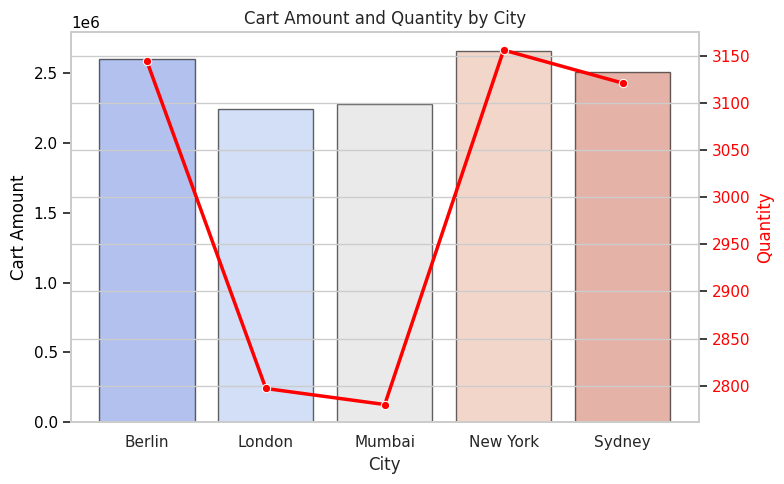

In [ ]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(8, 5))

# Create bar plot for cart amount
sns.barplot(x='city', y='cart amount', data=city_cart, palette='coolwarm', edgecolor='black', ax=ax1, alpha=0.6)
ax1.set_ylabel('Cart Amount', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid(False)

# Create a second y-axis for the quantity line plot
ax2 = ax1.twinx()
sns.lineplot(x='city', y='quantity', data=city_cart, color='red', marker='o', ax=ax2, linewidth=2.5)
ax2.set_ylabel('Quantity', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add titles and labels
plt.title('Cart Amount and Quantity by City')
ax1.set_xlabel('City')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
city_gender_cartamount=customer_product_cart.groupby(['city','gender']).agg({'cart amount':'sum'}).reset_index()
city_gender_cartamount['cart amount thousands']=city_gender_cartamount['cart amount']/1000
city_gender_cartamount['cart amount thousands']=city_gender_cartamount['cart amount thousands'].round(2)

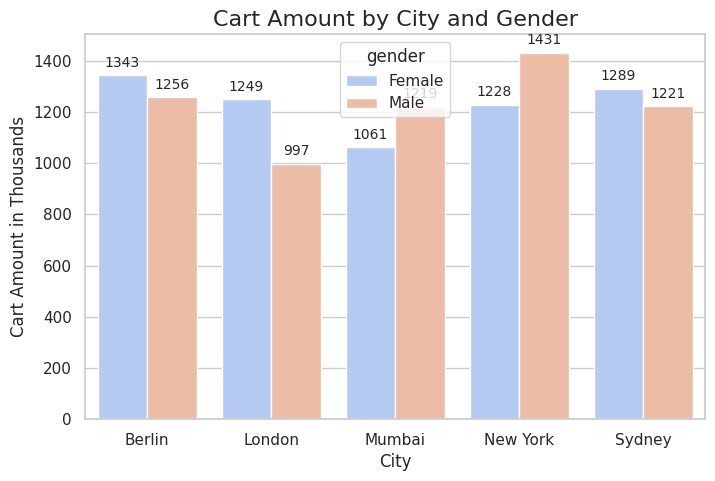

In [ ]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(8, 5))
barplot = sns.barplot(x='city', y='cart amount thousands', hue='gender', data=city_gender_cartamount, palette='coolwarm')

# Add data labels on the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),  # Format the label
                     (p.get_x() + p.get_width() / 2., p.get_height()),  # Position the label
                     ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=10)

# Add title and labels
plt.title('Cart Amount by City and Gender', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Cart Amount in Thousands', fontsize=12)

# Display plot
plt.show()

* For Berlin,London and Sydney Cart quantity is higer for female.
* For Mumbai,New York Cart Quantity is higer for male.


In [ ]:
customer_product_cart['abandonment qty']=np.where(pd.isna(customer_product_cart['abandonment_time']),0,customer_product_cart['quantity'])

## **3. Cart Abandonment Rate**

In [ ]:
# Product-Specific Cart Abandonment Rate
prodcut_abandonment=customer_product_cart.groupby(['product_name']).agg({'quantity':'sum','abandonment qty':'sum'}).reset_index()
prodcut_abandonment['abandonment rate']=prodcut_abandonment['abandonment qty']*100/prodcut_abandonment['quantity']
prodcut_abandonment['abandonment rate']=prodcut_abandonment['abandonment rate'].round(2)
prodcut_abandonment['Rank']=prodcut_abandonment['abandonment rate'].rank(method='dense',ascending=False)
top_10_product_abandonment_rate=prodcut_abandonment[prodcut_abandonment['Rank']<=10].sort_values(by=['Rank'])

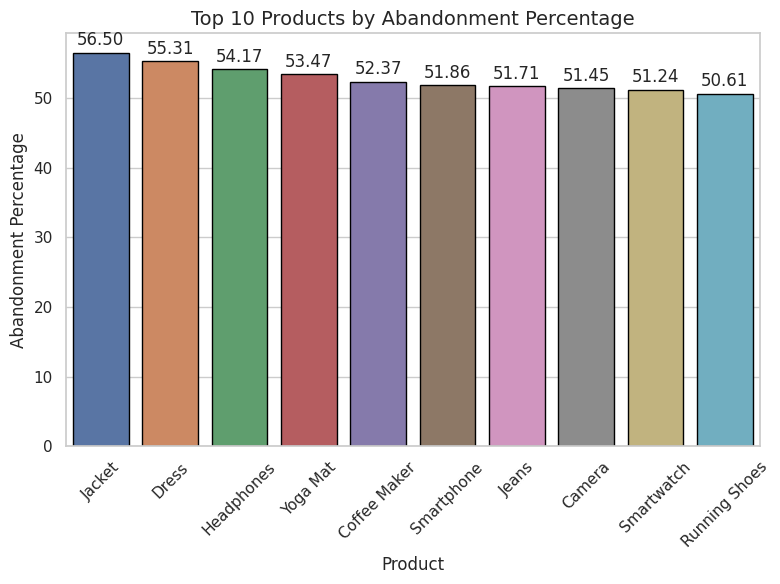

In [ ]:
# Setting figure size
plt.figure(figsize=(8,6))

# Creating bar plot using seaborn
ax = sns.barplot(x='product_name', y='abandonment rate', data=top_10_product_abandonment_rate, edgecolor='black')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adding title and labels
plt.title('Top 10 Products by Abandonment Percentage', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Abandonment Percentage', fontsize=12)

# Adding values on top of bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points')

# Display the plot
plt.tight_layout()
plt.show()

* The top 10 products exhibit significant cart abandonment rates, with the highest being Jackets at 56.50% and the lowest in this list being Running Shoes at 50.61%.
* All products have abandonment rates above 50%, indicating potential issues in the purchasing process across these categories.
* Jackets and Dresses rank 1st and 2nd in abandonment rates, both with over 55% abandonment, signaling these items may face issues such as high prices, inadequate descriptions, or a poor online user experience.
* Products like Headphones (54.17%), Smartphones (51.86%), and Smartwatches (51.24%) show high abandonment rates, suggesting that electronics as a category may require a better checkout experience or more competitive pricing to reduce abandonment.

In [ ]:
# Categorywise Abandnoment Rate
category_abandnoment=customer_product_cart.groupby(['category']).agg({'quantity':'sum','abandonment qty':'sum'}).reset_index()
category_abandnoment['abandonment rate']=category_abandnoment['abandonment qty']*100/category_abandnoment['quantity']
category_abandnoment['abandonment rate']=category_abandnoment['abandonment rate'].round(2)

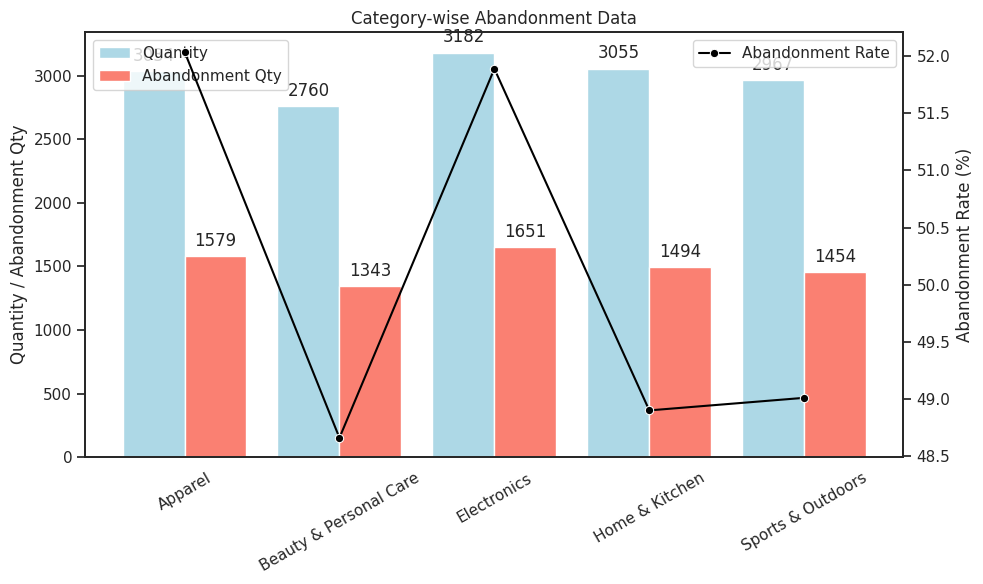

In [ ]:
# Set the plot style without gridlines
sns.set(style="white")

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Set bar width and positions for side-by-side bars
bar_width = 0.4
index = np.arange(len(category_abandnoment['category']))

# Plot side-by-side bar charts for 'quantity' and 'abandonment_qty'
bars1 = ax1.bar(index - bar_width/2, category_abandnoment['quantity'], bar_width, label='Quantity', color='lightblue')
bars2 = ax1.bar(index + bar_width/2, category_abandnoment['abandonment qty'], bar_width, label='Abandonment Qty', color='salmon')

# Set x-ticks and labels
ax1.set_xticks(index)
ax1.set_xticklabels(category_abandnoment['category'], rotation=30)

# Add data labels on top of the bars
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), ha='center', va='bottom')

# Create a second y-axis to plot the abandonment rate
ax2 = ax1.twinx()
sns.lineplot(x=index, y='abandonment rate', data=category_abandnoment, color='black', marker='o', label='Abandonment Rate', ax=ax2)

# Remove gridlines from both axes
ax1.grid(False)
ax2.grid(False)

# Add labels and title
ax1.set_ylabel('Quantity / Abandonment Qty')
ax2.set_ylabel('Abandonment Rate (%)')
plt.title('Category-wise Abandonment Data')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.tight_layout()
plt.show()

* Apparel shows an abandonment rate of 52.04%, followed closely by Electronics at 51.89%. These two categories have the highest abandonment rates, indicating potential friction in the purchase process for these types of products.
* This could be due to factors such as sizing issues (in Apparel), high competition and price sensitivity (in Electronics), or inadequate product descriptions, which can often affect these categories.
* Categories such as Beauty & Personal Care (48.66%), Home & Kitchen (48.90%), and Sports & Outdoors (49.01%) have slightly lower abandonment rates, but they are still significant, with nearly half of all products in these categories being abandoned in the cart.
* The abandonment rates across all categories hover around the 48-52% range. This suggests that while certain product categories, like Apparel and Electronics, face slightly higher abandonment challenges, overall cart abandonment is a common issue across different product types.
* Personalized marketing, cart reminders, or targeted promotions (e.g., free shipping or discounts) could be applied across all categories to reduce abandonment and encourage conversion.

In [ ]:
# Device-Specific Cart Abandonment Rate
customer_product_device_cart=pd.merge(device,customer_product_cart,how='inner',on='device_id')
customer_product_device_abandnoment=customer_product_device_cart.groupby(['device_type']).agg({'quantity':'sum','abandonment qty':'sum'}).reset_index()
customer_product_device_abandnoment['abandonment rate']=customer_product_device_abandnoment['abandonment qty']*100/customer_product_device_abandnoment['quantity']
customer_product_device_abandnoment['abandonment rate']=customer_product_device_abandnoment['abandonment rate'].round(2)

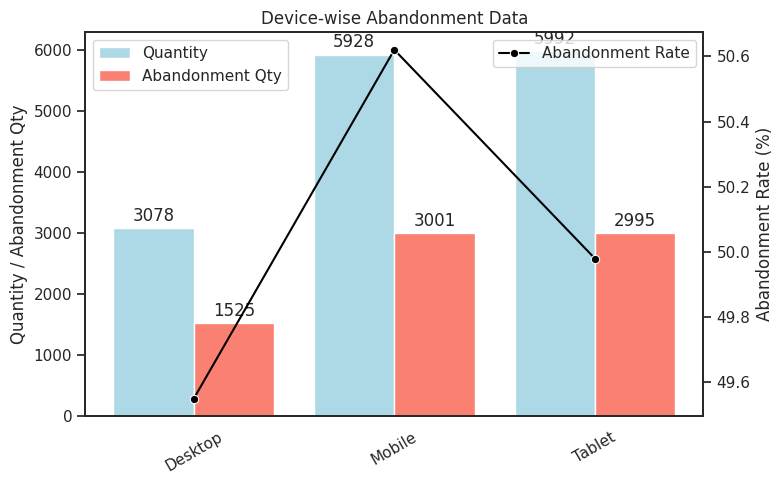

In [ ]:
# Set the plot style without gridlines
sns.set(style="white")

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(8, 5))

# Set bar width and positions for side-by-side bars
bar_width = 0.4
index = np.arange(len(customer_product_device_abandnoment['device_type']))

# Plot side-by-side bar charts for 'quantity' and 'abandonment_qty'
bars1 = ax1.bar(index - bar_width/2, customer_product_device_abandnoment['quantity'], bar_width, label='Quantity', color='lightblue')
bars2 = ax1.bar(index + bar_width/2, customer_product_device_abandnoment['abandonment qty'], bar_width, label='Abandonment Qty', color='salmon')

# Set x-ticks and labels
ax1.set_xticks(index)
ax1.set_xticklabels(customer_product_device_abandnoment['device_type'], rotation=30)

# Add data labels on top of the bars
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), ha='center', va='bottom')

# Create a second y-axis to plot the abandonment rate
ax2 = ax1.twinx()
sns.lineplot(x=index, y='abandonment rate', data=customer_product_device_abandnoment, color='black', marker='o', label='Abandonment Rate', ax=ax2)

# Remove gridlines from both axes
ax1.grid(False)
ax2.grid(False)

# Add labels and title
ax1.set_ylabel('Quantity / Abandonment Qty')
ax2.set_ylabel('Abandonment Rate (%)')
plt.title('Device-wise Abandonment Data')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.tight_layout()
plt.show()

* Mobile devices show the highest abandonment rate at 50.62%, indicating that more than half of the users shopping via mobile devices abandon their carts. This could be due to issues such as mobile site usability, longer load times, or complicated checkout processes on mobile.
* Tablet users have an abandonment rate of 49.98%, which is nearly equal to Desktop users at 49.55%. Both are slightly lower than mobile but still close to the 50% mark, showing that abandonment is an issue across all device types.
* Desktop users generally have a slightly better experience, but the difference is minimal, suggesting that usability improvements could be beneficial for all platforms.
* The abandonment rates across Desktop, Mobile, and Tablet are all quite close to each other, hovering around 50%. This indicates that regardless of the device, there are universal factors leading to cart abandonment, such as unclear product details, shipping costs, or insufficient payment methods.

In [ ]:
# Top 3 Product of Each Category By Abandnoment Rate
category_product_abandnoment=customer_product_cart.groupby(['category','product_name']).agg({'quantity':'sum','abandonment qty':'sum'}).reset_index()
category_product_abandnoment['abandonment rate']=category_product_abandnoment['abandonment qty']*100/category_product_abandnoment['quantity']
category_product_abandnoment['abandonment rate']=category_product_abandnoment['abandonment rate'].round(2)
category_product_abandnoment['Rank']=category_product_abandnoment.groupby(['category'])['abandonment rate'].rank(method='dense',ascending=False)
top_3_abandnoment_rate=category_product_abandnoment[category_product_abandnoment['Rank']<=3].sort_values(by=['category','Rank'],ascending=[True,True])

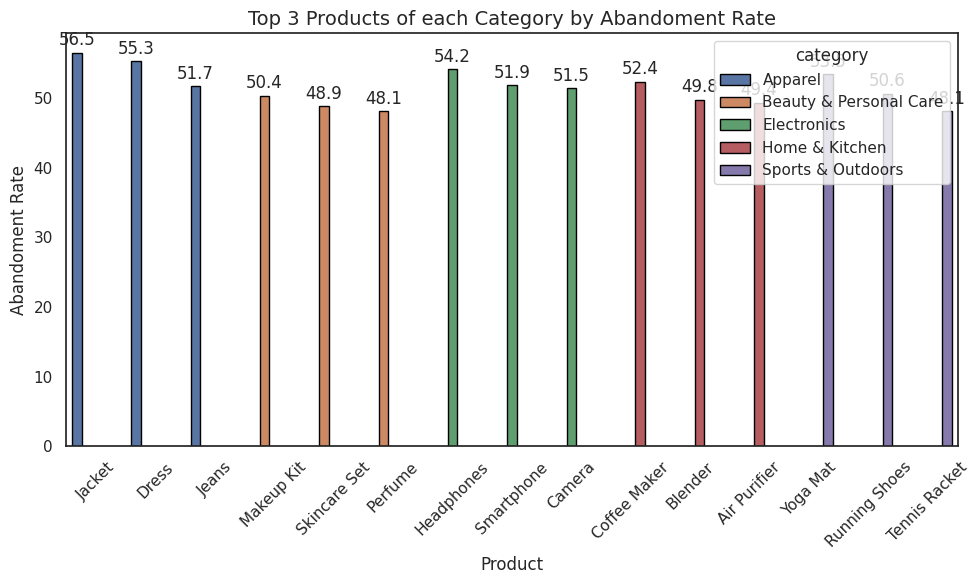

In [ ]:
# Setting figure size
plt.figure(figsize=(10,6))

# Creating bar plot using seaborn
ax = sns.barplot(x='product_name', y='abandonment rate', data=top_3_abandnoment_rate, hue='category', edgecolor='black')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adding title and labels
plt.title('Top 3 Products of each Category by Abandoment Rate', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Abandoment Rate', fontsize=12)

# Adding values on top of bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points')

# Display the plot
plt.tight_layout()
plt.show()

**Key Observations and Recommendations:**

* Apparel Products: The high abandonment rates of Jacket and Dress suggest that apparel might need more detailed sizing guides, virtual try-on features, or more competitive pricing. Addressing these issues can potentially reduce the friction in decision-making.

* Electronics: The abandonment rate for Headphones and Smartphone indicates that potential buyers may be reconsidering these higher-ticket items, possibly due to comparison shopping, pricing concerns, or insufficient product details. Improving product specifications, offering discounts, or showcasing customer reviews could help.

* Beauty Products: For Beauty & Personal Care, more personalization (e.g., targeted recommendations or virtual makeup try-ons) could reduce the abandonment rate, especially for items like Makeup Kits and Perfume.

* Home Appliances: Offering additional benefits such as extended warranties, free shipping, or financing options for higher-priced items like Coffee Makers could help reduce abandonment in this category.

In [ ]:
# Customer-Specific Cart Abandonment Rate
city_CAR=customer_product_cart.groupby(['city']).agg({'quantity':'sum','abandonment qty':'sum'}).reset_index()
city_CAR['abandonment rate']=city_CAR['abandonment qty']*100/city_CAR['quantity']
city_CAR['abandonment rate']=city_CAR['abandonment rate'].round(2)

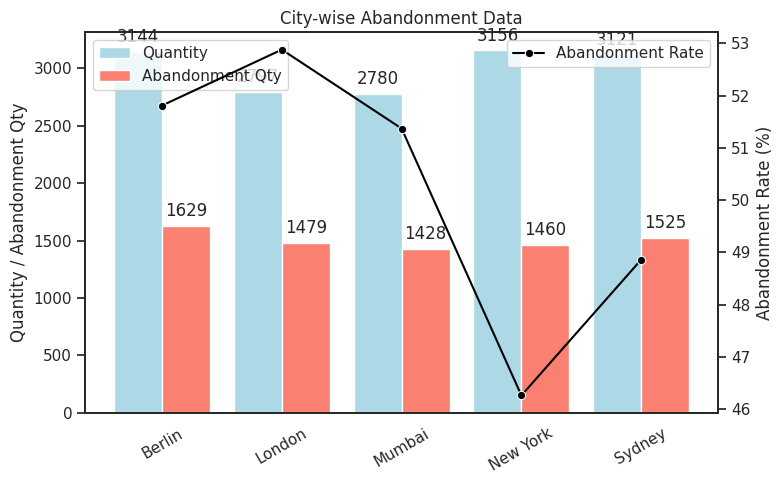

In [ ]:
# Set the plot style without gridlines
sns.set(style="white")

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(8, 5))

# Set bar width and positions for side-by-side bars
bar_width = 0.4
index = np.arange(len(city_CAR['city']))

# Plot side-by-side bar charts for 'quantity' and 'abandonment_qty'
bars1 = ax1.bar(index - bar_width/2, city_CAR['quantity'], bar_width, label='Quantity', color='lightblue')
bars2 = ax1.bar(index + bar_width/2, city_CAR['abandonment qty'], bar_width, label='Abandonment Qty', color='salmon')

# Set x-ticks and labels
ax1.set_xticks(index)
ax1.set_xticklabels(city_CAR['city'], rotation=30)

# Add data labels on top of the bars
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), ha='center', va='bottom')

# Create a second y-axis to plot the abandonment rate
ax2 = ax1.twinx()
sns.lineplot(x=index, y='abandonment rate', data=city_CAR, color='black', marker='o', label='Abandonment Rate', ax=ax2)

# Remove gridlines from both axes
ax1.grid(False)
ax2.grid(False)

# Add labels and title
ax1.set_ylabel('Quantity / Abandonment Qty')
ax2.set_ylabel('Abandonment Rate (%)')
plt.title('City-wise Abandonment Data')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.tight_layout()
plt.show()

**Potential Factors Influencing Abandonment by City**:
* Shipping Costs/Time: Higher shipping costs or longer delivery times may lead to higher abandonment rates, especially in cities like London and Berlin.
* Currency & Payment Methods: Differences in payment options, local currency, and the availability of trusted payment methods could influence the purchase decision.
* Customer Behavior Differences: Customers in different cities may have varied expectations regarding product pricing, delivery speed, and overall convenience, contributing to differing abandonment rates.

**Actionable Insights**:

Targeted Strategies for High Abandonment Cities:
* For London and Berlin, focus on localizing the shopping experience by offering better shipping terms, providing more relevant product information, or implementing localized promotions to address the higher cart abandonment.
* Investigate the checkout process in these cities to identify any barriers that might be contributing to the high abandonment rates.
Leverage New York's Lower Abandonment Rate:
* Study what factors contribute to New York's lower abandonment rate. This may provide insights into what aspects of the shopping experience are working well, which can be replicated in other cities.

In [ ]:
# Cart Abandnomenr Rate Monthly Trend
monthly_abandnoment=pd.merge(date,customer_product_device_cart,how='left',on='date_id')
monthly_abandnoment['month']=monthly_abandnoment['date'].dt.strftime('%Y-%m')
monthly_abandnomentrate=monthly_abandnoment.groupby(['month']).agg({'quantity':'sum','abandonment qty':'sum'}).reset_index()
monthly_abandnomentrate['abandonment rate']=monthly_abandnomentrate['abandonment qty']*100/monthly_abandnomentrate['quantity']

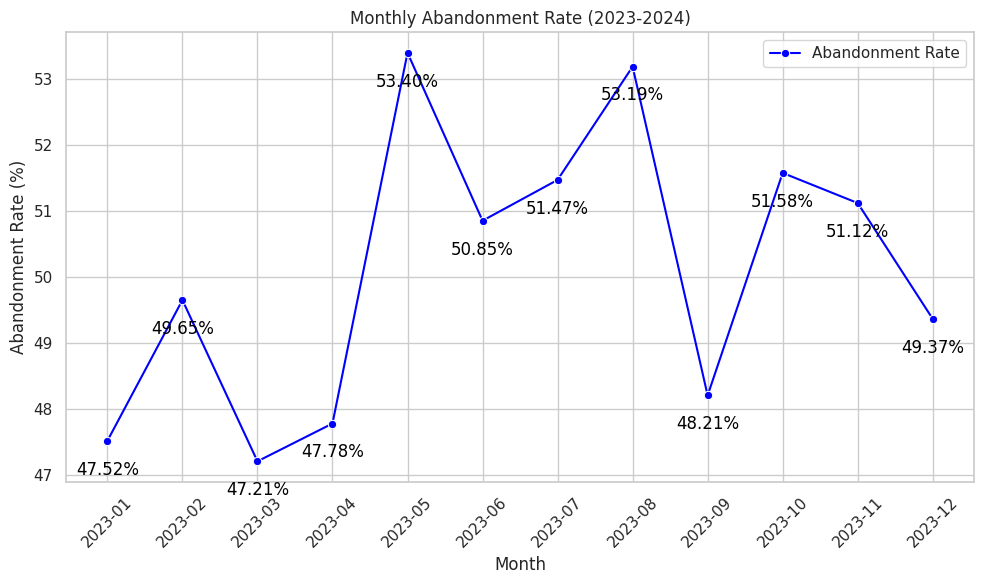

In [ ]:
# Set plot style
sns.set(style="whitegrid")

# Create the figure and axis
plt.figure(figsize=(10, 6))

# Plot the line chart
sns.lineplot(x='month', y='abandonment rate', data=monthly_abandnomentrate, marker='o', color='blue', label='Abandonment Rate')

# Get y-axis limits to determine dynamic positioning of labels
y_min, y_max = plt.ylim()

# Add data labels for each point
for i, rate in enumerate(monthly_abandnomentrate['abandonment rate']):
    # Place the label above or below the point based on its value relative to the y-axis range
    offset = 0.3 if rate < (y_max - y_min) / 2 else -0.3  # Adjust the offset dynamically
    plt.text(i, rate + offset, f'{rate:.2f}%', ha='center', va='bottom' if offset > 0 else 'top', color='black')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.ylabel('Abandonment Rate (%)')
plt.xlabel('Month')
plt.title('Monthly Abandonment Rate (2023-2024)')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show plot
plt.show()

**Key Observations and Insights:**

* Higher abandonment rates in May and August may be linked to factors such as seasonal shopping patterns, holiday sales, or promotions that increase traffic but also lead to higher cart abandonment. It could be useful to investigate if special events (e.g., sales, promotions) during these months contribute to this trend.

* In months like May and August, where abandonment is particularly high, consider optimizing the checkout process, offering reminders, discount incentives, or limited-time offers to convert abandonments into completed purchases.

**Actionable Insights:**

* For months like May and August with high abandonment rates, consider offering cart abandonment recovery tactics such as retargeting ads, special discounts, or fast checkout options to reduce hesitation and capture the customers who are likely to abandon their carts.

* Investigate if special events, promotions, or seasonal factors (e.g., holidays or sales) in May and August are contributing to higher abandonment, and adjust strategies accordingly (e.g., offering incentives or improving product visibility).

* Consider adjusting marketing strategies in months with higher abandonment rates to focus on conversion—for example, offering limited-time offers, free shipping, or easy returns to incentivize purchase completions.

In [ ]:
# Device specific Abandonment Rate
device_abandonment=monthly_abandnoment.groupby(['month','device_type']).agg({'quantity':'sum','abandonment qty':'sum'}).reset_index()
device_abandonment['abandonment rate']=device_abandonment['abandonment qty']*100/device_abandonment['quantity']

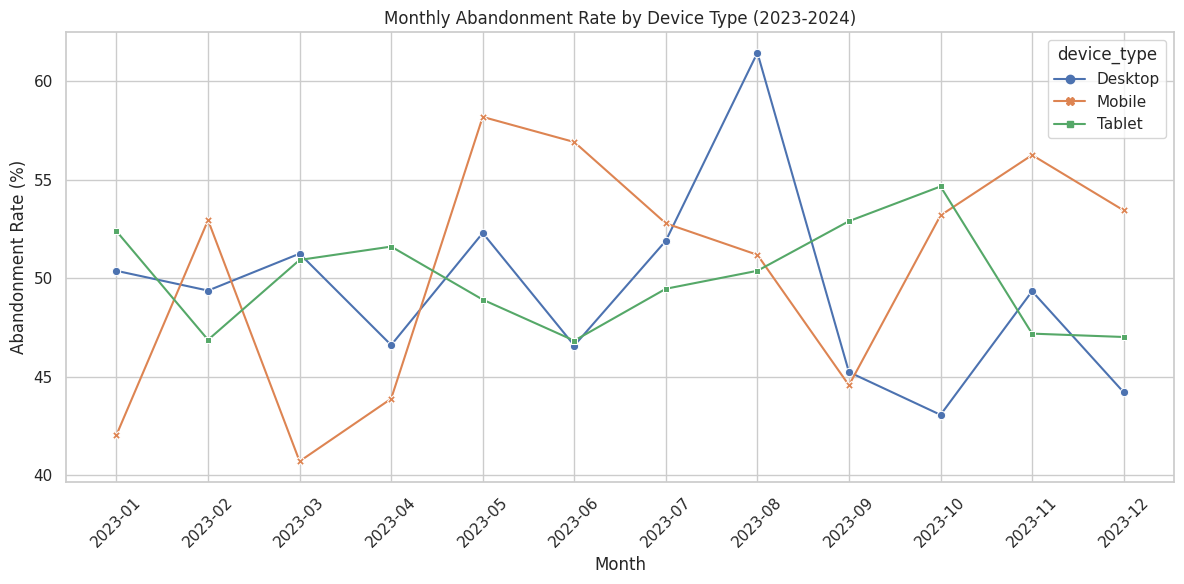

In [ ]:
# Set plot style
sns.set(style="whitegrid")

# Create the figure and axis
plt.figure(figsize=(12, 6))

# Plot the line chart with Seaborn
sns.lineplot(x='month', y='abandonment rate', hue='device_type', style='device_type', markers=True, dashes=False, data=device_abandonment)

# Add labels and title
plt.ylabel('Abandonment Rate (%)')
plt.xlabel('Month')
plt.title('Monthly Abandonment Rate by Device Type (2023-2024)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a grid for better visualization
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

Key Observations Across Device Types:

* Mobile Devices consistently have lower abandonment rates than tablets and desktops in most months, except for May, where both mobile and tablet abandonment rates are particularly high.
* Tablet and Desktop show higher abandonment rates in May, with tablet users also abandoning carts significantly across other months like July and October.

In [ ]:
# Product Category wise Cart Abandonment
category_monthly=monthly_abandnoment.groupby(['month','category']).agg({'quantity':'sum','abandonment qty':'sum'}).reset_index()
category_monthly['abandonment rate']=category_monthly['abandonment qty']*100/category_monthly['quantity']

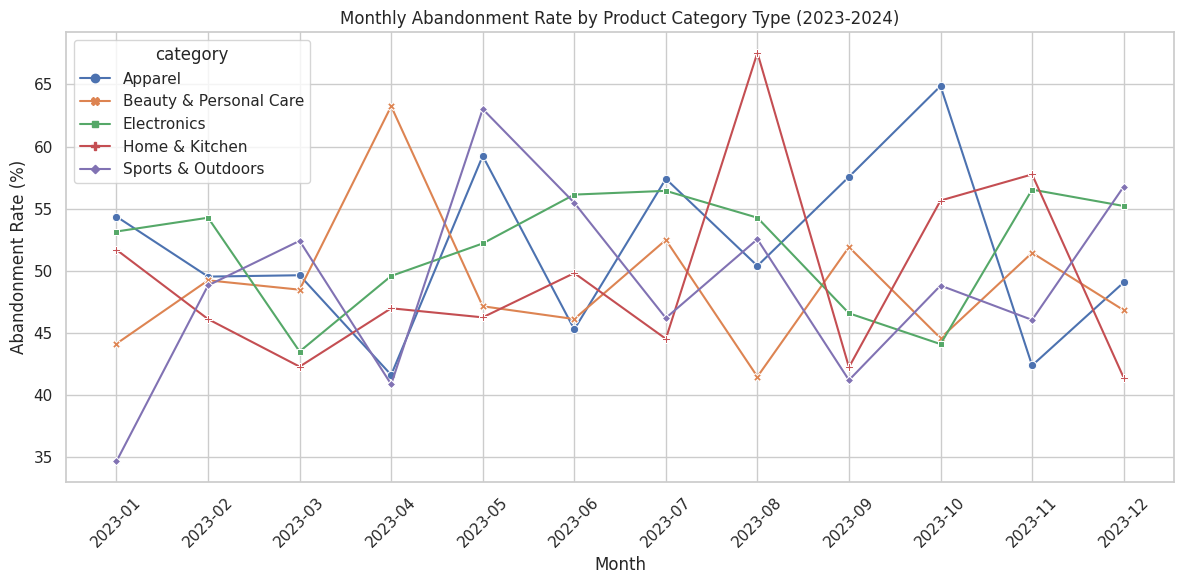

In [ ]:
# Set plot style
sns.set(style="whitegrid")

# Create the figure and axis
plt.figure(figsize=(12, 6))

# Plot the line chart with Seaborn
sns.lineplot(x='month', y='abandonment rate', hue='category', style='category', markers=True, dashes=False, data=category_monthly)

# Add labels and title
plt.ylabel('Abandonment Rate (%)')
plt.xlabel('Month')
plt.title('Monthly Abandonment Rate by Product Category Type (2023-2024)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a grid for better visualization
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

**Observations:**

**Apparel Category:**
* The Apparel category consistently has high abandonment rates, with May seeing the highest rate at 59.25%, and October following closely with 64.86%. This suggests that customers might be experiencing issues such as sizing uncertainty, lack of detailed product information, or dissatisfaction with the overall purchasing process for apparel.

**Beauty & Personal Care:**
* The Beauty & Personal Care category has significant variability in abandonment rates across months, with April having the highest abandonment rate at 63.24%. This could indicate that customers may be unsure about product effectiveness, quality, or pricing, especially during certain months like April and July where abandonment spikes.

**Home & Kitchen:**
* The Home & Kitchen category saw a sharp spike in abandonment in August with a 67.54% rate, which is the highest for this category. This could point to issues like high costs or the complexity of decision-making for such products, especially in times of promotions or heavy sales periods.

**Recommendations:**

**Enhance Apparel Shopping Experience:**
* Improve the sizing and return policy for the Apparel category. Consider implementing virtual try-on tools, detailed sizing guides, and free returns to mitigate the high abandonment rates. Additionally, providing discounts or limited-time offers might increase conversion, especially in months like May and October where abandonment is highest.

**Address Beauty & Personal Care Abandonment:**
* For the Beauty & Personal Care category, especially during months like April, it may be worth focusing on customer reviews, product trials, and clearer product descriptions. These improvements can help build trust, ensuring that customers feel confident about purchasing products. Offering sample packs or bundle deals could also increase conversions.

**Optimize the Home & Kitchen Category During High-Abandonment Months:**
* The Home & Kitchen category, particularly in August, has a high abandonment rate. To address this, consider offering price incentives, extended warranties, or free shipping on high-cost items. Additionally, reducing friction during checkout (e.g., guest checkouts or simplifying payment options) could help ease decision-making, especially during peak shopping periods.

# 3. Cohort Analysis

## **3.1 Customer Retention Cohort**

In [ ]:
monthly_abandnoment['Order_Month'] = monthly_abandnoment['date'].dt.to_period('M')
monthly_abandnoment['Cohort']=monthly_abandnoment.groupby(['customer_id'])['date'].transform('min').dt.to_period('M')
df_ch1=monthly_abandnoment.groupby(['Order_Month','Cohort']).agg({'customer_id':'nunique'}).reset_index().rename(columns={'customer_id':'unique customers'})

In [ ]:
from operator import attrgetter
df_ch1['Cohort_Periods'] = (df_ch1.Order_Month - df_ch1.Cohort).apply(attrgetter('n'))
cohort_pivot=df_ch1.pivot(index='Cohort',columns='Cohort_Periods',values='unique customers')

In [ ]:
retention_percentage = cohort_pivot.divide(cohort_pivot.iloc[:, 0], axis=0)
cohort_size = cohort_pivot.iloc[:, 0]

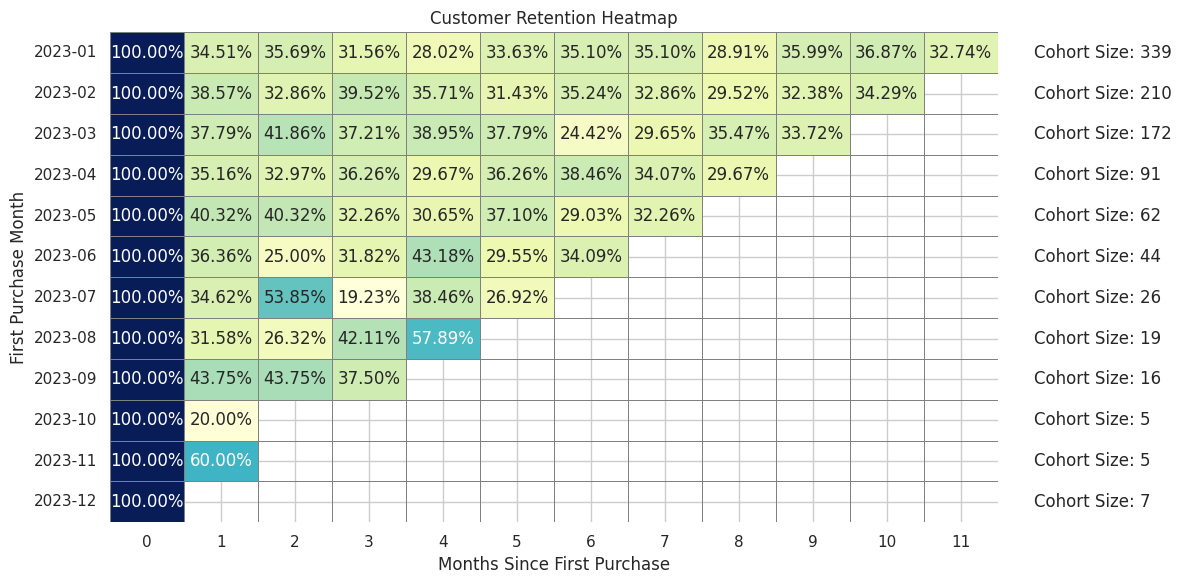

In [ ]:
plt.figure(figsize=(12, 6))

# Plot the heatmap
sns.heatmap(data=retention_percentage, annot=True, cmap='YlGnBu', fmt='.2%', linewidths=0.5, linecolor='gray',cbar=False)
plt.title('Customer Retention Heatmap')
plt.xlabel('Months Since First Purchase')
plt.ylabel('First Purchase Month')

# Add cohort size as annotations
for i in range(len(cohort_size)):
    plt.text(len(cohort_size) + 0.5, i + 0.5, f'Cohort Size: {int(cohort_size.iloc[i])}', va='center', ha='left')

plt.tight_layout()
plt.show()

**Observations:**

**Significant Decline in Retention Over Time**:
* Retention rates consistently decline as customers move further from the initial month (Month 0). For example, in 2023-01, retention drops from 100% in the first month to 32.74% by Month 11. This indicates that customers are more likely to disengage over time, with long-term retention becoming a key challenge.

**Higher Retention in Early Months for Some Cohorts**:
* Certain cohorts, such as 2023-11, exhibit higher retention in the first few months, with 60% retention in Month 1. This suggests that specific strategies implemented in these periods may have led to better initial customer engagement, which could be leveraged further to boost long-term retention.

**Inconsistent Retention Across Cohorts**:
* There is significant variability in retention across cohorts. For example:The 2023-05 cohort has a high initial retention but experiences a steep decline afterward.The 2023-08 cohort shows a notable spike in Month 4 (57.89%), but the pattern is inconsistent compared to other cohorts.2023-10 and 2023-11 cohorts have fewer data points, reflecting potential incomplete or newer cohort data.

**Recommendations to Improve Retention:**

**Implement Proactive Engagement Strategies Early On**:
* Given that retention rates decline over time, focus on maintaining customer interest during the critical months after the initial purchase. Consider offering loyalty rewards, personalized follow-ups, or special promotions in months 1 to 6 to re-engage customers and boost long-term retention. This could be particularly useful for cohorts like 2023-01 and 2023-05, which show significant drop-offs after the first few months.

**Replicate Strategies from Higher Retention Cohorts**:
* Cohorts like 2023-11 show strong early retention. Analyze the factors that contributed to the higher retention in Month 1 (e.g., targeted campaigns, product satisfaction, or loyalty incentives) and apply similar strategies to other cohorts, particularly those with high drop-offs (e.g., 2023-05 or 2023-10). This could involve personalized onboarding, product education, or early incentives to encourage repeat purchases.

## **3.2 Cart Anandnoment Rate Cohort**

In [ ]:
monthlt_abandnoment_rate=monthly_abandnoment.groupby(['Order_Month','Cohort']).agg({'quantity':'sum','abandonment qty':'sum'}).reset_index()
monthlt_abandnoment_rate['abandonment rate']=monthlt_abandnoment_rate['abandonment qty']*100/monthlt_abandnoment_rate['quantity']
monthlt_abandnoment_rate['abandonment rate']=monthlt_abandnoment_rate['abandonment rate'].round(2)
df_ch2=monthlt_abandnoment_rate

In [ ]:
from operator import attrgetter
df_ch2['Cohort_Periods'] = (df_ch2.Order_Month - df_ch2.Cohort).apply(attrgetter('n'))
abandonment_cohort_pivot=df_ch2.pivot(index='Cohort',columns='Cohort_Periods',values='abandonment rate')
abandonment_cohort_pivot=abandonment_cohort_pivot.reset_index()

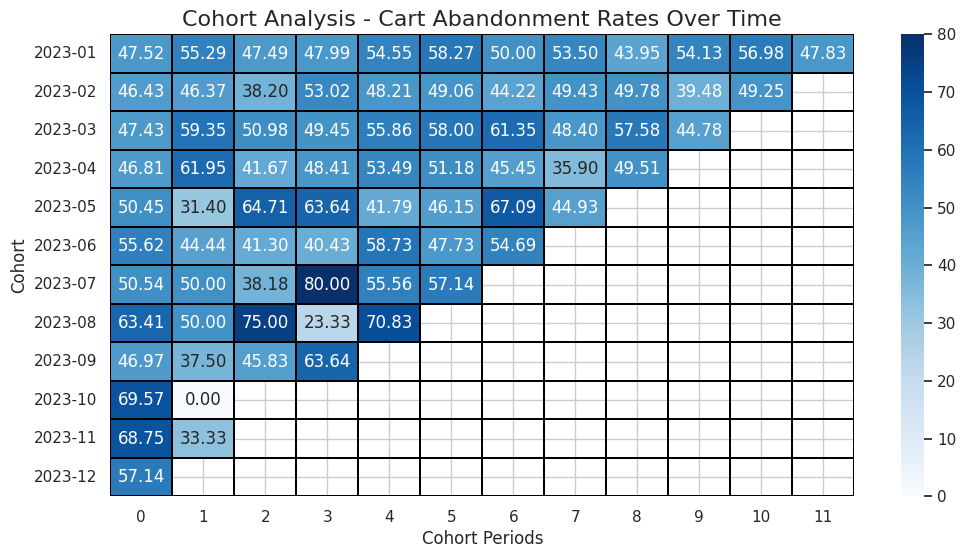

In [ ]:
# Set 'Cohort' as the index
abandonment_cohort_pivot.set_index('Cohort', inplace=True)

# Set plot size
plt.figure(figsize=(12, 6))

# Create the heatmap
sns.heatmap(abandonment_cohort_pivot, annot=True, fmt=".2f", cmap="Blues", linewidths=0.2, linecolor='black')

# Add title and labels
plt.title('Cohort Analysis - Cart Abandonment Rates Over Time', fontsize=16)
plt.xlabel('Cohort Periods', fontsize=12)
plt.ylabel('Cohort', fontsize=12)

# Show the plot
plt.show()

**Observations**

**High Fluctuations in Abandonment Rates Over Time**:
In some cohorts, such as 2023-05 and 2023-07, there are significant fluctuations in abandonment rates across periods. For instance:
In 2023-05, abandonment rates jump from 31.40% in Month 1 to 64.71% in Month 2, and then peak at 67.09% in Month 6, showing high volatility. This suggests that a large number of customers from this cohort may be abandoning their carts over a short span.
Similarly, 2023-07 shows a sharp peak at 80.00% in Month 3. Such high variability indicates a need for deeper analysis of the factors driving these changes.

**Month 0 Retention vs. Long-Term Abandonment**:
The Month 0 (initial period) shows relatively higher retention, but as the months progress, there is a noticeable decline in retention, resulting in increasing abandonment rates.
For example:
In 2023-01, the abandonment rate is around 47.52% in Month 0, but it rises gradually to 56.98% in Month 10. This steady increase in abandonment suggests that retention strategies may not be as effective as time progresses.

**Recommendations to Improve Customer Retention and Reduce Abandonment:**

**Analyze Causes of High Fluctuation in Abandonment Rates**:
For cohorts like 2023-05 and 2023-07, where there are sharp increases in abandonment rates in specific months (e.g., Month 2 and Month 3), conduct further analysis to determine the exact causes.
It could be related to:
* Seasonal promotions, shipping delays, or pricing changes in these months.
* A suboptimal checkout experience, which could be driving higher abandonment during these periods.
Once these factors are identified, tailor retention strategies to mitigate abandonment in these critical months.

**Strengthen Long-Term Retention Strategies**:
As customer abandonment rates increase over time, it’s essential to introduce retention initiatives that extend beyond the initial period.
Some potential strategies could include:
* Offering post-purchase follow-ups like discounts or loyalty points for repeat purchases.
* Sending personalized reminders or re-engagement emails targeting customers who have abandoned carts after a certain period.
* Implementing time-limited offers to encourage return visits and purchases during periods of high abandonment (e.g., Month 2 to Month 6).

In [ ]:
cities=monthly_abandnoment['city'].unique()
cities

array(['Sydney', 'New York', 'Mumbai', 'Berlin', 'London'], dtype=object)

## 3.3 Citywise Cart Abandonment Rate

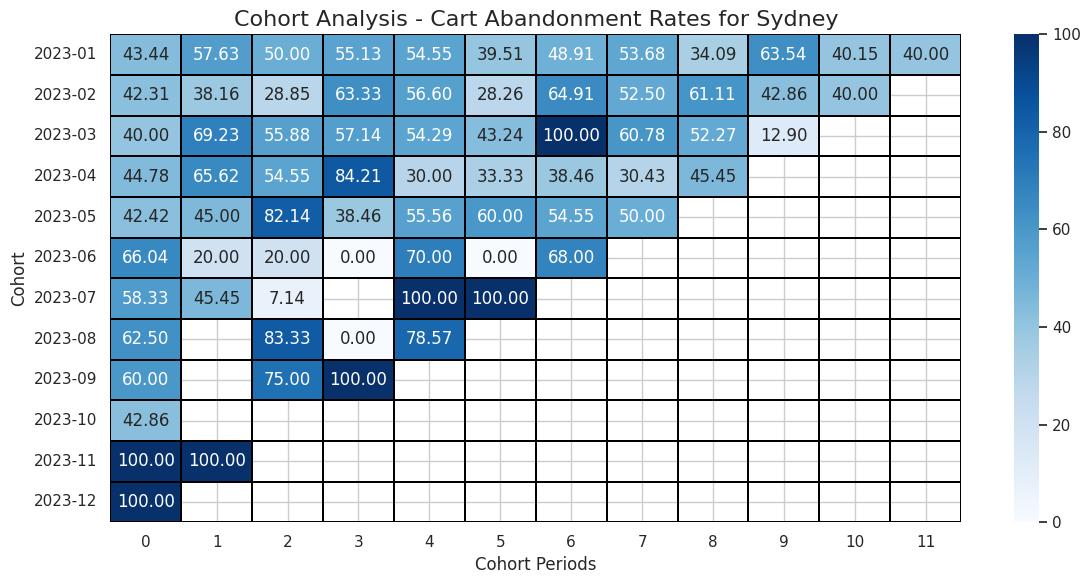

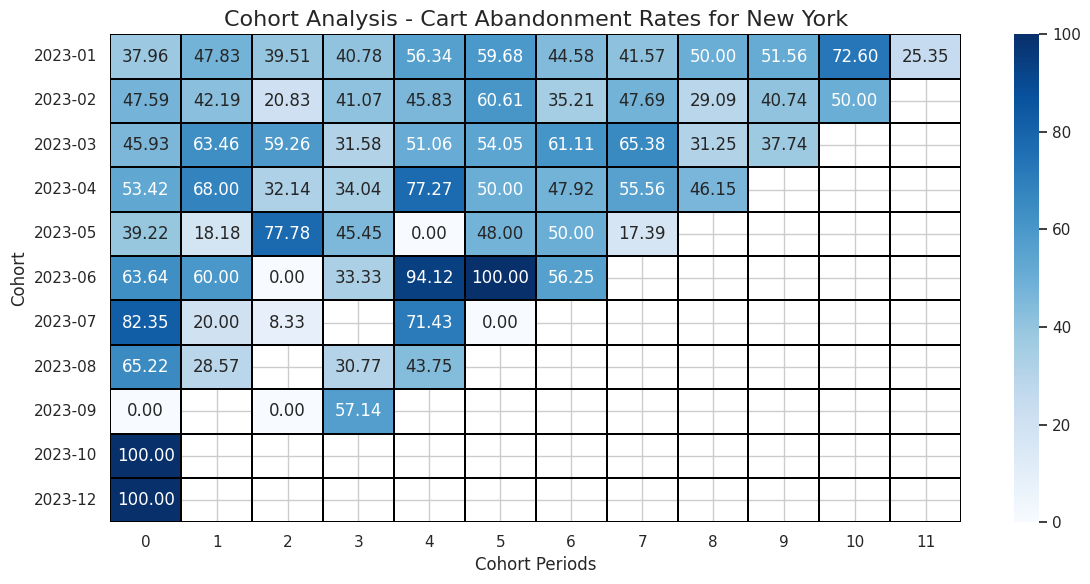

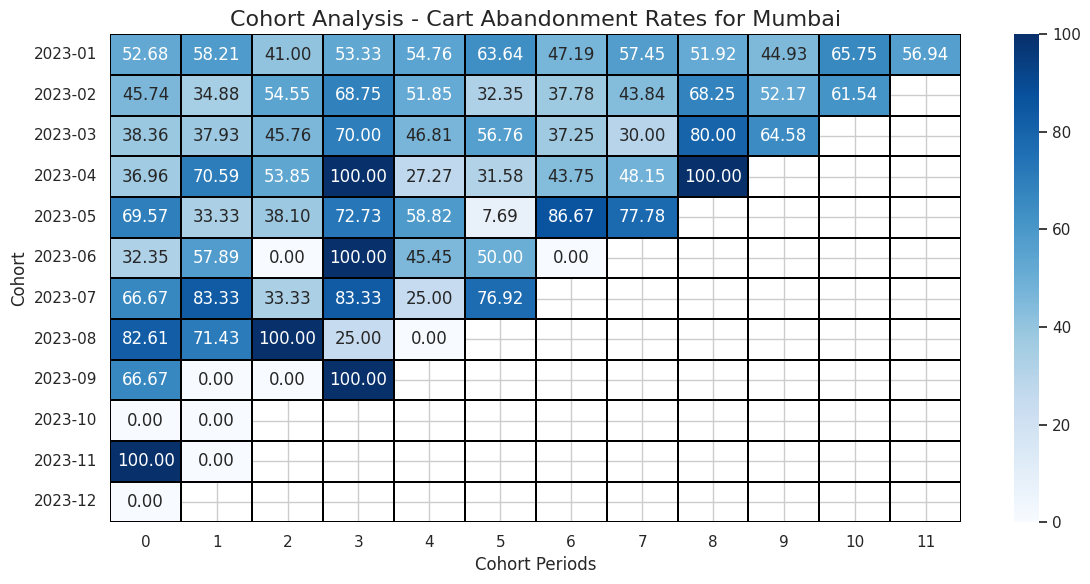

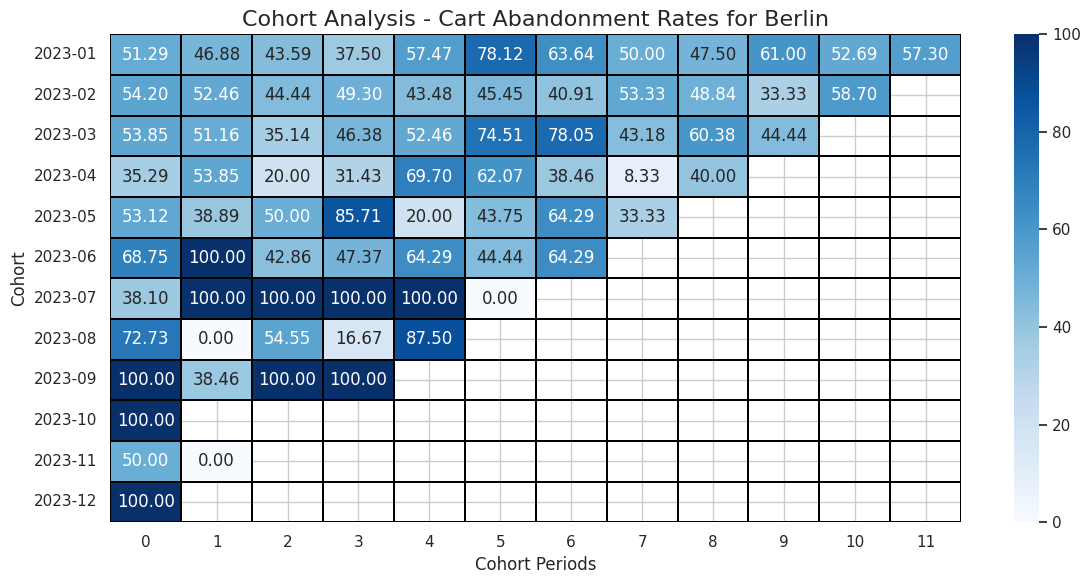

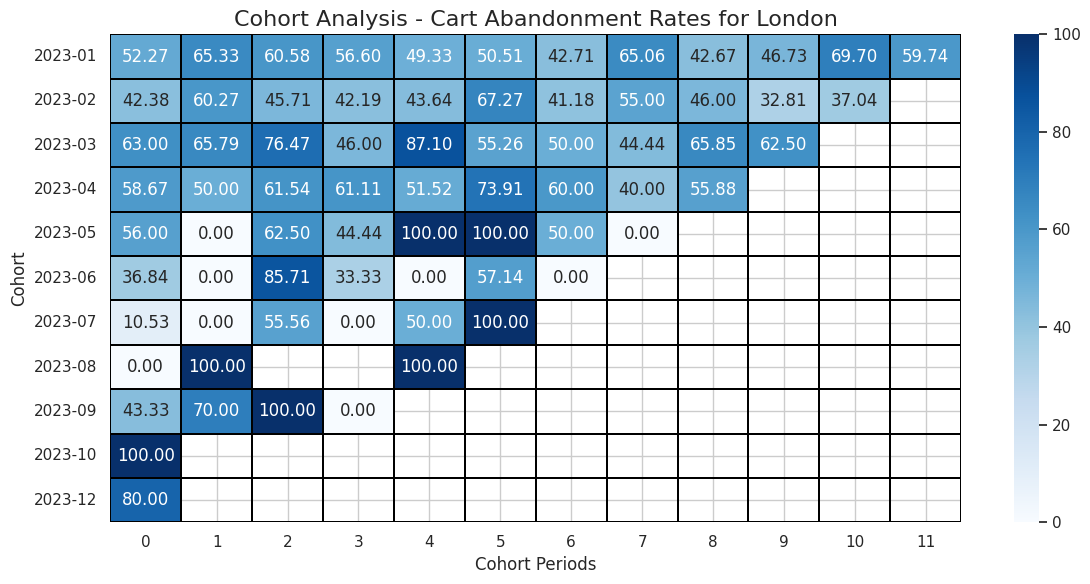

In [ ]:
for i in cities:
    # Filter data by city
    city_cohort = monthly_abandnoment[monthly_abandnoment['city'] == i]

    # Group by 'Order_Month' and 'Cohort', aggregating quantity and abandonment qty
    city_cohort1 = city_cohort.groupby(['Order_Month', 'Cohort']).agg({'quantity': 'sum','abandonment qty': 'sum'}).reset_index()

    # Calculate abandonment rate
    city_cohort1['abandonment rate'] = (city_cohort1['abandonment qty'] / city_cohort1['quantity']) * 100
    city_cohort1['abandonment rate'] = city_cohort1['abandonment rate'].round(2)

    # Calculate Cohort_Periods (difference in months between Order_Month and Cohort)
    city_cohort1['Cohort_Periods'] = (city_cohort1['Order_Month'] - city_cohort1['Cohort']).apply(attrgetter('n'))

    # Pivot data to create cohort heatmap structure
    city_cohort1_pivot = city_cohort1.pivot(index='Cohort', columns='Cohort_Periods', values='abandonment rate')

    # Set 'Cohort' as the index
    city_cohort1_pivot.reset_index(inplace=True)
    city_cohort1_pivot.set_index('Cohort', inplace=True)

    # Set plot size
    plt.figure(figsize=(12, 6))

    # Create the heatmap
    sns.heatmap(city_cohort1_pivot, annot=True, fmt=".2f", cmap="Blues", linewidths=0.2, linecolor='black')

    # Add title and labels
    plt.title(f'Cohort Analysis - Cart Abandonment Rates for {i}', fontsize=16)
    plt.xlabel('Cohort Periods', fontsize=12)
    plt.ylabel('Cohort', fontsize=12)

    # Show the plot
    plt.tight_layout()
    plt.show()

## **3.4 Product Categorywise Cart Abandonment Cohort**

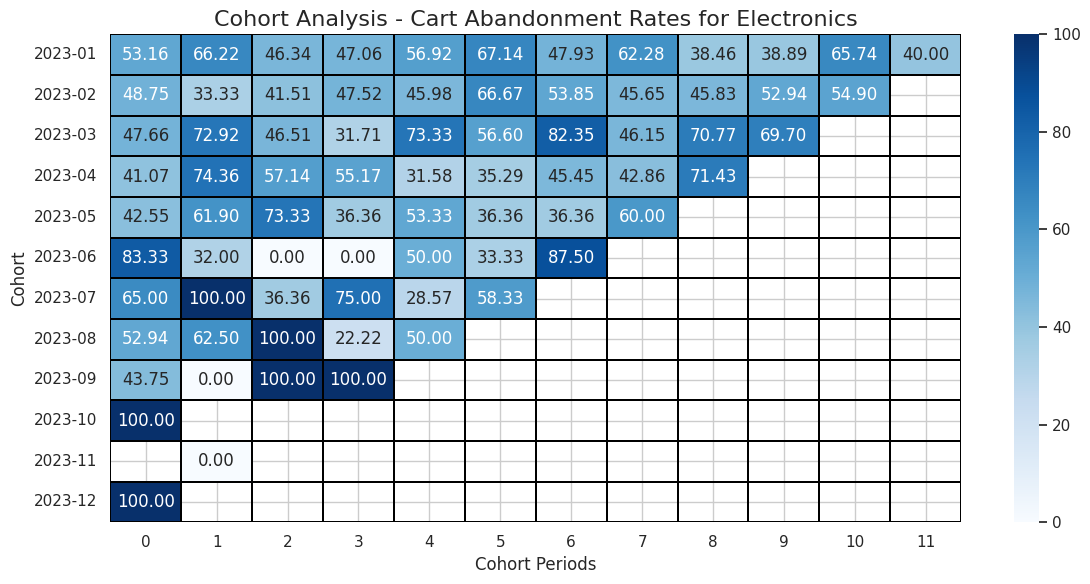

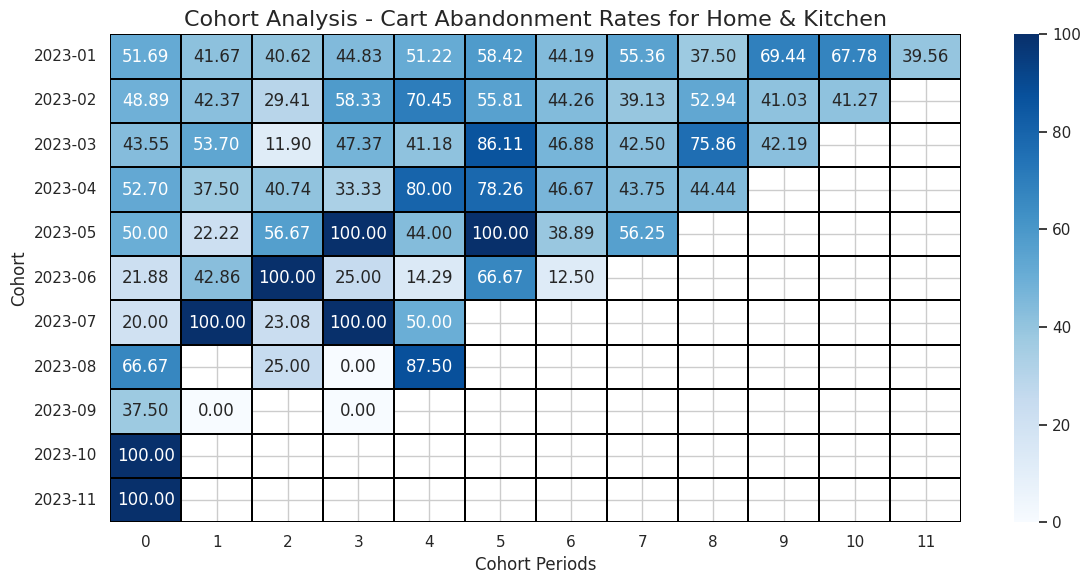

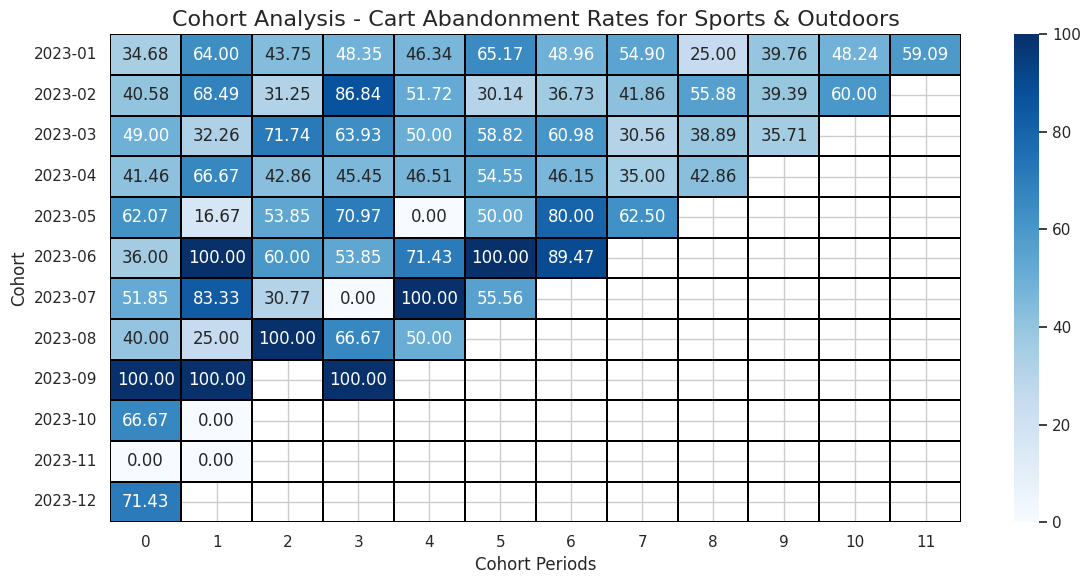

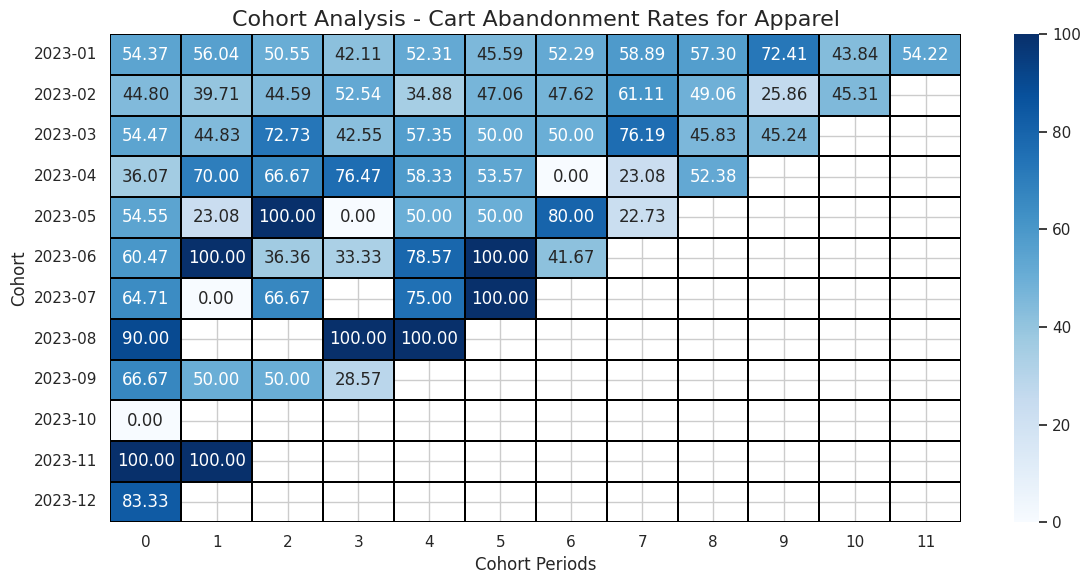

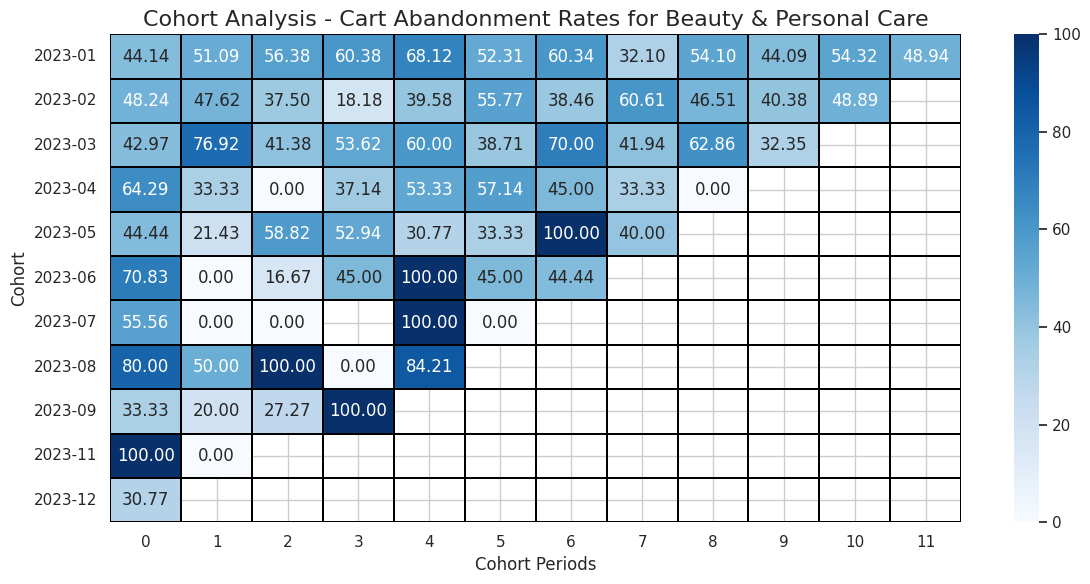

In [ ]:
category=monthly_abandnoment['category'].unique()
for i in category:
    # Filter data by city
    category_cohort = monthly_abandnoment[monthly_abandnoment['category'] == i]

    # Group by 'Order_Month' and 'Cohort', aggregating quantity and abandonment qty
    category_cohort1 = category_cohort.groupby(['Order_Month', 'Cohort']).agg({'quantity': 'sum','abandonment qty': 'sum'}).reset_index()

    # Calculate abandonment rate
    category_cohort1['abandonment rate'] = (category_cohort1['abandonment qty'] / category_cohort1['quantity']) * 100
    category_cohort1['abandonment rate'] = category_cohort1['abandonment rate'].round(2)

    # Calculate Cohort_Periods (difference in months between Order_Month and Cohort)
    category_cohort1['Cohort_Periods'] = (category_cohort1['Order_Month'] - category_cohort1['Cohort']).apply(attrgetter('n'))

    # Pivot data to create cohort heatmap structure
    category_cohort1_pivot = category_cohort1.pivot(index='Cohort', columns='Cohort_Periods', values='abandonment rate')

    # Set 'Cohort' as the index
    category_cohort1_pivot.reset_index(inplace=True)
    category_cohort1_pivot.set_index('Cohort', inplace=True)

    # Set plot size
    plt.figure(figsize=(12, 6))

    # Create the heatmap
    sns.heatmap(category_cohort1_pivot, annot=True, fmt=".2f", cmap="Blues", linewidths=0.2, linecolor='black')

    # Add title and labels
    plt.title(f'Cohort Analysis - Cart Abandonment Rates for {i}', fontsize=16)
    plt.xlabel('Cohort Periods', fontsize=12)
    plt.ylabel('Cohort', fontsize=12)

    # Show the plot
    plt.tight_layout()
    plt.show()

## **3.5 Gender Wise Cart Abandonment Cohort**

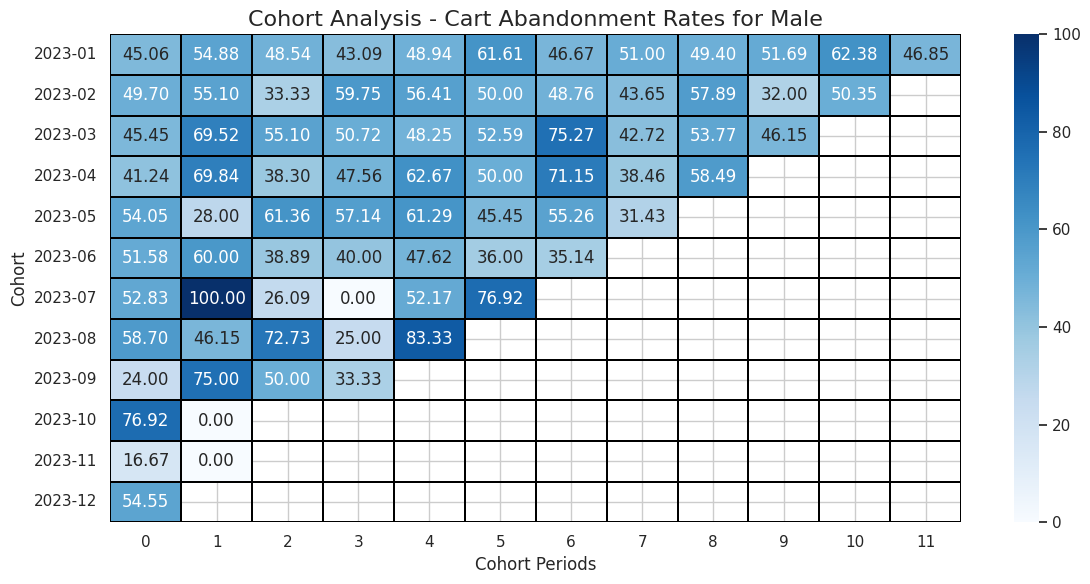

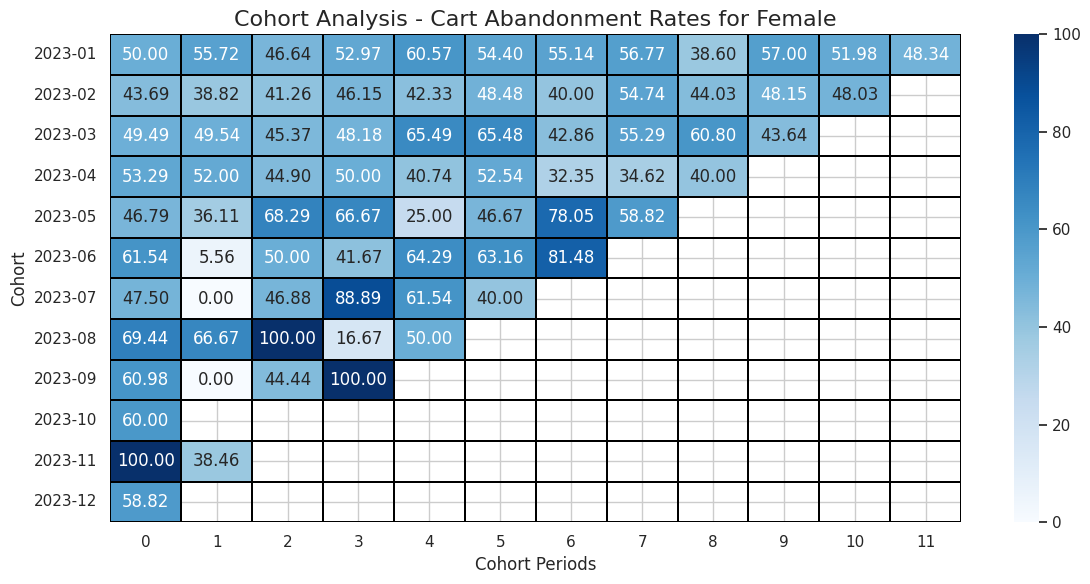

In [ ]:
gender=monthly_abandnoment['gender'].unique()
for i in gender:
    # Filter data by city
    gender_cohort = monthly_abandnoment[monthly_abandnoment['gender'] == i]

    # Group by 'Order_Month' and 'Cohort', aggregating quantity and abandonment qty
    gender_cohort1 = gender_cohort.groupby(['Order_Month', 'Cohort']).agg({'quantity': 'sum','abandonment qty': 'sum'}).reset_index()

    # Calculate abandonment rate
    gender_cohort1['abandonment rate'] = (gender_cohort1['abandonment qty'] / gender_cohort1['quantity']) * 100
    gender_cohort1['abandonment rate'] = gender_cohort1['abandonment rate'].round(2)

    # Calculate Cohort_Periods (difference in months between Order_Month and Cohort)
    gender_cohort1['Cohort_Periods'] = (gender_cohort1['Order_Month'] - gender_cohort1['Cohort']).apply(attrgetter('n'))

    # Pivot data to create cohort heatmap structure
    gender_cohort1_pivot = gender_cohort1.pivot(index='Cohort', columns='Cohort_Periods', values='abandonment rate')

    # Set 'Cohort' as the index
    gender_cohort1_pivot.reset_index(inplace=True)
    gender_cohort1_pivot.set_index('Cohort', inplace=True)

    # Set plot size
    plt.figure(figsize=(12, 6))

    # Create the heatmap
    sns.heatmap(gender_cohort1_pivot, annot=True, fmt=".2f", cmap="Blues", linewidths=0.2, linecolor='black')

    # Add title and labels
    plt.title(f'Cohort Analysis - Cart Abandonment Rates for {i}', fontsize=16)
    plt.xlabel('Cohort Periods', fontsize=12)
    plt.ylabel('Cohort', fontsize=12)

    # Show the plot
    plt.tight_layout()
    plt.show()

# Hypothesis Testing

## **1. Cart Abandonment Rate for Males is more as compared to Female**

**Ho**: Cart Abandonment Rate is same for Males and Females

**H1**: Cart Abandonment Rate is more for Males as compared to Females

In [ ]:
male_abandnoment=monthly_abandnoment[monthly_abandnoment['gender']=='Male'][['quantity','abandonment qty']]
male_abandnoment['abandnoment rate']=male_abandnoment['abandonment qty']*100/male_abandnoment['quantity']

In [ ]:
female_abandnoment=monthly_abandnoment[monthly_abandnoment['gender']=='Female'][['quantity','abandonment qty']]
female_abandnoment['abandnoment rate']=female_abandnoment['abandonment qty']*100/female_abandnoment['quantity']

In [ ]:
sample_male=male_abandnoment['abandnoment rate'].sample(25)
sample_female=female_abandnoment['abandnoment rate'].sample(25)
alpha=0.05

In [ ]:
pop_male=male_abandnoment['abandnoment rate'].mean()
pop_female=female_abandnoment['abandnoment rate'].mean()
pop_male,pop_female

(50.442477876106196, 50.519169329073485)

In [ ]:
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test for both desktop and mobile users
shapiro_male = shapiro(sample_male)
shapiro_female = shapiro(sample_female)

print("Shapiro-Wilk test for male users:", shapiro_male)
print("Shapiro-Wilk test for female users:", shapiro_female)

Shapiro-Wilk test for male users: ShapiroResult(statistic=0.6340094308868554, pvalue=1.0609921987075107e-06)
Shapiro-Wilk test for female users: ShapiroResult(statistic=0.6245824732223888, pvalue=8.1975440541887e-07)


In [ ]:
from scipy.stats import levene

# Perform Levene's test
levene_test = levene(sample_male, sample_female)
print(levene_test)

LeveneResult(statistic=0.07894736842105263, pvalue=0.7799366366414126)


In [ ]:
import scipy.stats as stats

t_statistic, p_value = stats.ttest_ind(sample_male, sample_female)

print("t-statistic:", t_statistic)
print("p-value:", p_value/2)

t-statistic: -0.2809757434745082
p-value: 0.3899683183207062


In [ ]:
p_value=p_value/2
if p_value<alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to Reject Null Hypothesis')

Failed to Reject Null Hypothesis


**From the above hypothesis we can conclude that for 95% confidance interval male and female cart abandnoment is similar**

## **2. Cart Abandonment Rate is dependent on Device Type**

**Ho**: There is no significant difference in Mean Cart Abandonment Rate for all device type.

**H1**: Cart Abandonment rate is different for atleast one device type.

In [ ]:
monthly_abandnoment['abandonment_rate']=monthly_abandnoment['abandonment qty']*100/monthly_abandnoment['quantity']

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
# Fit the model
model = ols('abandonment_rate~device_type', data=monthly_abandnoment.sample(50)).fit()

# Perform ANOVA
aov_table = sm.stats.anova_lm(model, type=2)
print(aov_table)

               df         sum_sq      mean_sq         F    PR(>F)
device_type   2.0   10855.555556  5427.777778  2.238859  0.117827
Residual     47.0  113944.444444  2424.349882       NaN       NaN


In [ ]:
# Perform pairwise t-tests
pairwise_t = model.t_test_pairwise('device_type')
print(pairwise_t.result_frame)

                     coef    std err         t     P>|t|  Conf. Int. Low  \
Mobile-Desktop -28.333333  17.979061 -1.575907  0.121755      -64.502540   
Tablet-Desktop   2.777778  18.349803  0.151379  0.880325      -34.137264   
Tablet-Mobile   31.111111  15.996987  1.944811  0.057795       -1.070676   

                Conf. Int. Upp.  pvalue-hs  reject-hs  
Mobile-Desktop         7.835873   0.228686      False  
Tablet-Desktop        39.692819   0.880325      False  
Tablet-Mobile         63.292898   0.163557      False  


**As p value(0.907519) is greater than alpha(0.05) implies falied to reject Null Hypothesis i.e there is no significant difference in mean cart abandonment rate across device type.**

## **3. The cart abandonment rate is higher for high-value products compared to low-value products.**

**Ho**: There is no significant difference in Avg Cart Abandonment Rate of High and Low Value Products

**H1**: There is significant difference in Avg Cart Abandonment Rate of High and Low Value Products

In [ ]:
avg_product_price=product['price'].mean()

In [ ]:
product['price category']=np.where(product['price']<avg_product_price,'Low Value','High Value')

In [ ]:
product_price_category=pd.merge(product,customer_product_cart,how='inner',on='product_id').reset_index()
product_price_category['abandonment rate']=product_price_category['abandonment qty']*100/product_price_category['quantity']

In [ ]:
high_value_product=product_price_category[product_price_category['price category']=='High Value']['abandonment rate']
low_value_product=product_price_category[product_price_category['price category']=='Low Value']['abandonment rate']

In [ ]:
high_value_abandonment_rate=high_value_product.mean()
low_value_abandonment_rate=low_value_product.mean()
high_value_abandonment_rate,low_value_abandonment_rate

(50.49751243781095, 50.457456541628545)

In [ ]:
high_value_product_sample=high_value_product.sample(25)
low_value_product_sample=low_value_product.sample(25)

In [ ]:
# Performing Shapiro Test for Normality Check
shapiro_high_value=shapiro(high_value_product_sample)
shapiro_low_value=shapiro(low_value_product_sample)

print("Shapiro-Wilk test for high value products:", shapiro_high_value)
print("Shapiro-Wilk test for low value products:", shapiro_low_value)

Shapiro-Wilk test for high value products: ShapiroResult(statistic=0.5649764887771824, pvalue=1.746694389282924e-07)
Shapiro-Wilk test for low value products: ShapiroResult(statistic=0.6340094308868554, pvalue=1.0609921987075107e-06)


In [ ]:
# Perform Levene's test
levene_test = levene(high_value_product_sample,low_value_product_sample)
print(levene_test)

LeveneResult(statistic=1.3714285714285714, pvalue=0.2473474423532722)


In [ ]:
t_statistic, p_value = stats.ttest_ind(high_value_product_sample,low_value_product_sample)
p_value=p_value/2
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 2.0493901531919194
p-value: 0.022955127599972102


In [ ]:
alpha=0.05
if p_value<alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to Reject Null Hypothesis')

Reject Null Hypothesis


**For 95% Confidance Interval There is no significant difference between Hign Value and Low Value product Abandonment Rate**